In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers,Sequential
import visualkeras as vk
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import load_model
import cv2

In [2]:
path=r'C:\Projects\ML\datasets\alphabet fonts'
classes={}
count=0

##############

main_folder=os.listdir(path)

for i in main_folder:
    classes[count]=i
    count+=1
    
print(classes)
    

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


In [3]:


image_array=[]
alphabet=[]
alphabet_array=[]

for i in classes:
    subfolder_path=path+'\\'+classes[i]
    subfolder=os.listdir(subfolder_path)

    for j in subfolder:
        img=Image.open(subfolder_path+'\\'+j).convert('L')
        img=np.array(img.resize((28,28)))
        img=img.reshape(28,28,1)
        img = (img - np.min(img)) / (np.max(img) - np.min(img))
        image_array.append(img)
        alphabet.append(classes[i])
        alphabet_array.append(i)


print("Created Database")

Created Database


(28, 28, 1)
A


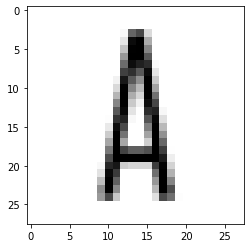

In [4]:
plt.imshow(image_array[0],cmap='gray')
print(image_array[0].shape)
print(alphabet[0])

In [5]:
pd.Series(alphabet).value_counts().sort_index()


A    1016
B    1016
C    1016
D    1016
E    1016
F    1016
G    1016
H    1016
I    1016
J    1016
K    1016
L    1016
M    1016
N    1016
O    1016
P    1016
Q    1016
R    1016
S    1016
T    1016
U    1016
V    1016
W    1016
X    1016
Y    1016
Z    1016
dtype: int64

In [6]:
print(type(image_array))
image_array=np.array(image_array)
alphabet_array=np.array(alphabet_array)
print(type(image_array))


<class 'list'>
<class 'numpy.ndarray'>


In [7]:
print(image_array.shape)
print(image_array[0].shape)

(26416, 28, 28, 1)
(28, 28, 1)


In [8]:
x_train,x_test,y_train,y_test=train_test_split(image_array,alphabet_array,train_size=0.8,test_size=0.2,random_state=10)
print(x_train.shape,y_test.shape)

(21132, 28, 28, 1) (5284,)


In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

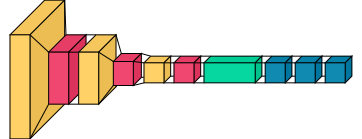

In [10]:

model.summary()
vk.layered_view(model)

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs=15,validation_split=0.3)

Epoch 1/15
463/463 [==============================] - 8s 11ms/step - loss: 1.8182 - accuracy: 0.4801 - val_loss: 0.3347 - val_accuracy: 0.9177
Epoch 2/15
463/463 [==============================] - 3s 7ms/step - loss: 0.2820 - accuracy: 0.9266 - val_loss: 0.2363 - val_accuracy: 0.9394
Epoch 3/15
463/463 [==============================] - 3s 7ms/step - loss: 0.1765 - accuracy: 0.9512 - val_loss: 0.1894 - val_accuracy: 0.9475
Epoch 4/15
463/463 [==============================] - 3s 7ms/step - loss: 0.1328 - accuracy: 0.9634 - val_loss: 0.1604 - val_accuracy: 0.9573
Epoch 5/15
463/463 [==============================] - 3s 7ms/step - loss: 0.0994 - accuracy: 0.9706 - val_loss: 0.1506 - val_accuracy: 0.9606
Epoch 6/15
463/463 [==============================] - 3s 7ms/step - loss: 0.0753 - accuracy: 0.9774 - val_loss: 0.1390 - val_accuracy: 0.9615
Epoch 7/15
463/463 [==============================] - 3s 7ms/step - loss: 0.0609 - accuracy: 0.9817 - val_loss: 0.1122 - val_accuracy: 0.9733
Epoch

In [13]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss :",test_loss)
print("Accuracy :",test_acc)

166/166 [==============================] - 1s 5ms/step - loss: 0.1092 - accuracy: 0.9769
Loss : 0.10918530821800232
Accuracy : 0.9769114255905151


In [14]:
#saving model
#model.save(r'large_model1.h5')

#loading model
#model = load_model('large_model.h5') 

#classes for character identification
classes={0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

In [15]:
img = cv2.imread(r'C:\Users\Sunny C\Desktop\test images\test.png')
img_copy = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))
img_pred = classes[np.argmax(model.predict(img_final))]
print(img_pred)

D
